In [1]:
# Importing Libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Importing Cifar10 Dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 30s 0us/step


In [4]:
# Creating Convolutional base

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
# Adding Dense Layers on top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
# Compile and Train the Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5326 - accuracy: 0.4417 - val_loss: 1.2639 - val_accuracy: 0.5434
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1729 - accuracy: 0.5828 - val_loss: 1.0841 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0083 - accuracy: 0.6455 - val_loss: 1.0382 - val_accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9062 - accuracy: 0.6805 - val_loss: 0.9156 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8314 - accuracy: 0.7087 - val_loss: 0.9012 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7753 - accuracy: 0.7280 - val_loss: 0.9024 - val_accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7221 - accuracy: 0.7462 - val_loss: 0.8710 -

313/313 - 3s - loss: 0.8649 - accuracy: 0.7116 - 3s/epoch - 8ms/step


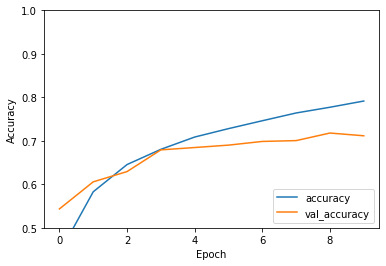

In [9]:
# Evaluate the Model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7116000056266785
